# The Fast & The Curious - Project Report <br>


### Members: 
&emsp; Georgi Nikolov<br>
&emsp; Daniel Valencia<br>
&emsp; Lizbeth Gutierrez<br>
&emsp; (NAME)


### Project Sections:
&emsp; Section 1: Project Introduction <br>
&emsp; Section 2: Changes to Project Thus Far <br>
&emsp; Section 3: Data Cleaning <br>
&emsp; Section 4: Exploritory Data Analysis <br>
&emsp; Section 5: Visualization <br>
&emsp; Section 6: Machine Learning Analysis <br>
&emsp; Section 7: Reflection <br>
&emsp; Section 8: Next Steps <br>




## Section 1: Project Introduction

As of this moment we have four different goals that we could like to accomplish and they are as follows,

1. We want to analyze weather data in order to make predictions about adverse weather conditions.
2. Climate change has caused weather patterns to become more severe and dangerous over the last few years.
3. Having access to more accurate weather predictions would allow for advanced warnings and help people escape potentially dangerous weather conditions.
4. We chose to investigate this topic because it is highly relevant to today’s world and severe weather will only get stronger as time goes on.
<br>

Ideally we will accomplish these goals via the following methodologies,<br>
> A Visualization that intends to look at temperature changes over the course of an entire year here in Chicago.
> A Machine learning implementation that will predict presentation based on data relating to air pressure and temperature.
> A Scatterplot to investigate if sea level air pressure relates to the average wind speed of a given area.
> An Histogram of weather condition codes to give insight into various meteorological tendencies  .


Generally speaking we will be using **MeteoStat** for our data collection<br>
1. API that connects to different weather stations around the world
2. Able to access historical data via independent weather stations 
3. Free for use in development (no license required)
4. Independent Python library compatible with Pandas




## Section 2: Changes to Project (From Check-in) <br>

## NOTE: THIS NEEDS TO BE DONE LAST

## Section 3: Data Cleaning <br>

First, we loaded up the data as a dataframe (df). We displayed the data as normal prior to cleaning it to show what is stored in the dataframe.

In [1]:
import pandas as pd
import requests

url = "https://meteostat.p.rapidapi.com/stations/daily"
querystring = {"station":"KPWK0","start":"2012-01-01","end":"2021-01-01","model":"true","units":"imperial"}
headers = {
	"X-RapidAPI-Key": "6fec950325msha54f5bc890b65e0p1fd8d0jsnc882976e1304",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers, params=querystring)
json = response.json()
type(json['data'])
type(json['data'][0])
df = pd.DataFrame(json['data'])
df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2012-01-01,36.7,30.9,45.0,NaN,None,268.0,17.2,None,NaN,None
1,2012-01-02,23.2,18.0,30.0,NaN,None,315.0,17.2,None,NaN,None
2,2012-01-03,21.2,12.9,28.0,0.000,None,NaN,9.3,None,1027.0,None
3,2012-01-04,33.3,26.1,41.0,0.000,None,NaN,7.9,None,1016.3,None
4,2012-01-05,38.5,25.0,50.0,0.000,None,NaN,6.7,None,1012.5,None
...,...,...,...,...,...,...,...,...,...,...,...
3284,2020-12-28,30.0,21.9,35.1,0.000,None,296.0,10.4,None,1024.9,None
3285,2020-12-29,25.7,18.0,32.0,NaN,None,145.0,6.3,None,NaN,None
3286,2020-12-30,32.0,27.0,36.0,0.291,None,246.0,13.3,None,1014.2,None
3287,2020-12-31,24.8,19.0,28.0,NaN,None,288.0,4.0,None,NaN,None


The columns from data frame that were dropped and were not kept were snow, wdir, wspd, tsun and wpgt. 
Snow is a integer value column that records the maximum snow dept in mm. Wdir is a column that tracks the average wind direction in degrees as an integer value. Wspd, and Wpgt are columns that track the average wind speed in km/h and the peak wind gust in km/h as float values. Tsun tracks the daily sunshien total in minutes as an integer type.

Since we are not focusing on information focused on wind and daily sunshine in this project, these rows were chosen to be dropped. since we are primarily focused on air pressure and temperature in this project, these columns dropped were not seen as important as others so they were not kept to keep the dataframe used cleaner. Furthermore, rows were dropped with NaN values because in the case of prcp 1435 rows were shown to not have a value in that specific square and in many of tehse cases, several rows also had a NaN value in prcp and pres. 

To keep the data cleaner to consistently use as many rows as possible, the rows discussed above were dropped. Furthermore, after dropping rows and columns, the dataframe used changed from a dataframe with 3289 rows × 11 columns to a dataframe with 1583 rows × 6 columns.

In [ ]:
# we will be keeping date, tavg, tmin, tmax, prcp, and pres columns, here we drop the columns discussed in the markdown above:
df = df.drop("snow", axis='columns')
df = df.drop("wdir", axis='columns')
df = df.drop("wspd", axis='columns')
df = df.drop("wpgt", axis='columns')
df = df.drop("tsun", axis='columns')

# shows the rows with NaN in rows:
df[df['prcp'].isna()]
df[df['pres'].isna()]

# drop rows with NaN in rows:
df = df.dropna(subset=['prcp','pres'])

#print post dropped rows, after cleaning data
df

## Section 4: Exploritory Data Analysis <br>

## Section 5: Visualization <br>

As the goal above suggests we will be taking a look at the different temperatures throughout the year here in Chicago, Illinois. 

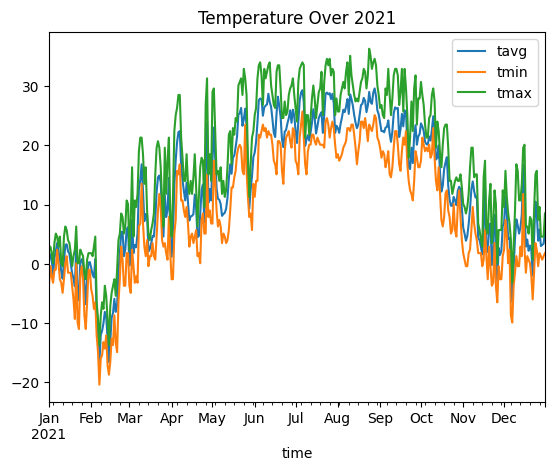

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2021, 12, 31)

# Create Point for Chicago
chicago = Point(41.868755, -87.646090, 70)

# Get daily data for 2018
data = Daily(chicago, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.title("Temperature Over 2021")
plt.show()

## Section 6: Machine Learning Analysis <br>

## Section 7: Reflection <br>

## Section 8: Next Steps <br>